In [4]:
import matplotlib.pyplot as plt

In [5]:
import pickle
import pandas as pd
import numpy as np 
with open("C:/Users/sammasi/Downloads/MUA_data.pkl", "rb") as f:
    #C:\Users\sammasi\Downloads
    data = pickle.load(f)

In [6]:
stimulus_diameter = np.array([0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 1., 1.2, 1.5, 1.8, 2., 2.4, 3., 3.5, 5., 10., 15., 20., 26.])

In [7]:
spike_count_arrays = []
for i in data.keys():
    if data[i][100.0]['spkR_NoL'].shape == (21, 19, 1000):
        spike_count_arrays.append(np.sum(np.sum(data[i][100.0]['spkR_NoL'][:,:,400:900],axis = 2),axis=0))

In [8]:
len(spike_count_arrays)

43

In [9]:
datadf = [] #temp array

In [10]:
for i, counts in enumerate(spike_count_arrays):
    for j, diameter in enumerate(stimulus_diameter):
        datadf.append(('cell{}'.format(i), diameter, counts[j]))


In [11]:
datadf = pd.DataFrame(datadf, columns=['Cell Number', 'Stimulus Diameter', 'Spike Count'])
datadf.head(50)

,Cell Number,Stimulus Diameter,Spike Count
0,cell0,0.1,124.0
1,cell0,0.2,317.0
2,cell0,0.4,307.0
3,cell0,0.5,272.0
4,cell0,0.6,308.0
5,cell0,0.8,257.0
6,cell0,1.0,316.0
7,cell0,1.2,322.0
8,cell0,1.5,317.0
9,cell0,1.8,258.0


In [12]:
datadf.describe()


,Stimulus Diameter,Spike Count
count,817.000000,817.000000
mean,5.000000,1011.227662
std,7.227924,993.750800
min,0.100000,33.000000
25%,0.600000,262.000000
50%,1.800000,592.000000
75%,5.000000,1382.000000
max,26.000000,3154.000000


In [13]:
datadf.describe(include='all')

,Cell Number,Stimulus Diameter,Spike Count
count,817,817.000000,817.000000
unique,43,NaN,NaN
top,cell0,NaN,NaN
freq,19,NaN,NaN
mean,NaN,5.000000,1011.227662
std,NaN,7.227924,993.750800
min,NaN,0.100000,33.000000
25%,NaN,0.600000,262.000000
50%,NaN,1.800000,592.000000
75%,NaN,5.000000,1382.000000


In [18]:
print(datadf[datadf['Spike Count']>2000])

    Cell Number  Stimulus Diameter  Spike Count
323      cell17                0.1       3078.0
324      cell17                0.2       3063.0
325      cell17                0.4       3056.0
326      cell17                0.5       3110.0
327      cell17                0.6       3104.0
..          ...                ...          ...
812      cell42                5.0       2720.0
813      cell42               10.0       2662.0
814      cell42               15.0       2565.0
815      cell42               20.0       2591.0
816      cell42               26.0       2593.0

[190 rows x 3 columns]


In [19]:
datadf["Stimulus Diameter"].unique()

array(['cell0', 'cell1', 'cell2', 'cell3', 'cell4', 'cell5', 'cell6',
       'cell7', 'cell8', 'cell9', 'cell10', 'cell11', 'cell12', 'cell13',
       'cell14', 'cell15', 'cell16', 'cell17', 'cell18', 'cell19',
       'cell20', 'cell21', 'cell22', 'cell23', 'cell24', 'cell25',
       'cell26', 'cell27', 'cell28', 'cell29', 'cell30', 'cell31',
       'cell32', 'cell33', 'cell34', 'cell35', 'cell36', 'cell37',
       'cell38', 'cell39', 'cell40', 'cell41', 'cell42'], dtype=object)

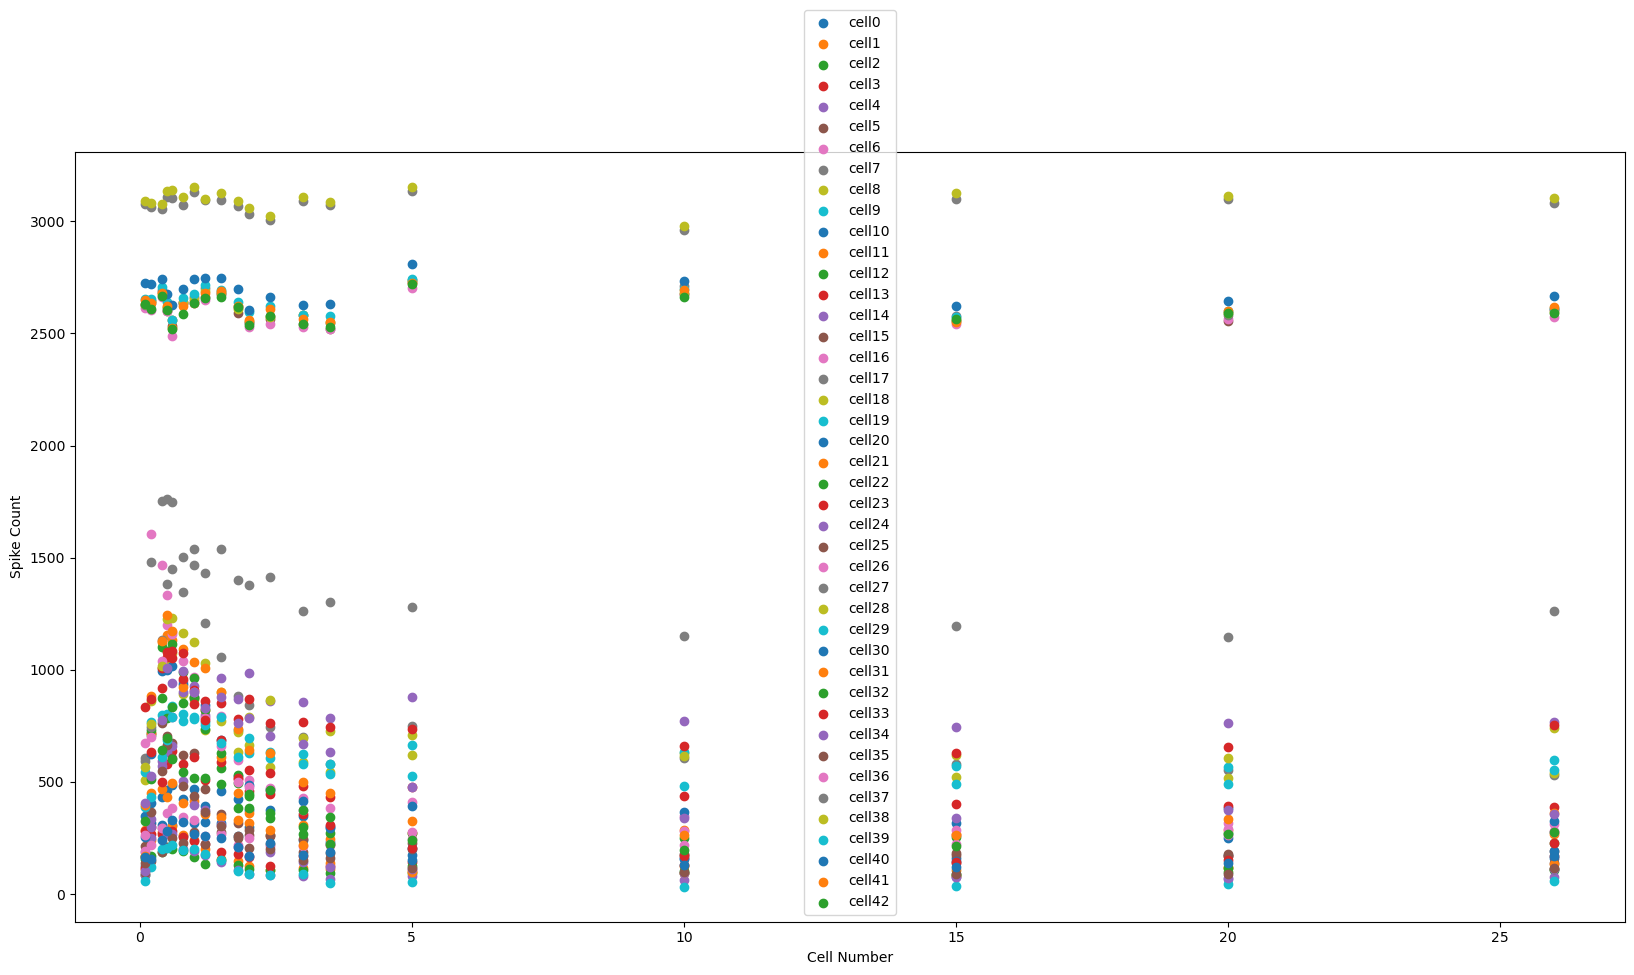

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the data
#data = pd.read_csv('data.csv')

# Create a 2D scatter plot
plt.figure(figsize=(20, 10))
#ax = fig.add_subplot(111)

for cell_num in datadf['Cell Number'].unique():
    cell_df = datadf[datadf["Cell Number"] == cell_num]
    plt.scatter(cell_df["Stimulus Diameter"], cell_df["Spike Count"], label=cell_num)
plt.legend(datadf['Cell Number'].unique())
plt.ylabel('Spike Count')
plt.xlabel('Cell Number')


plt.show()


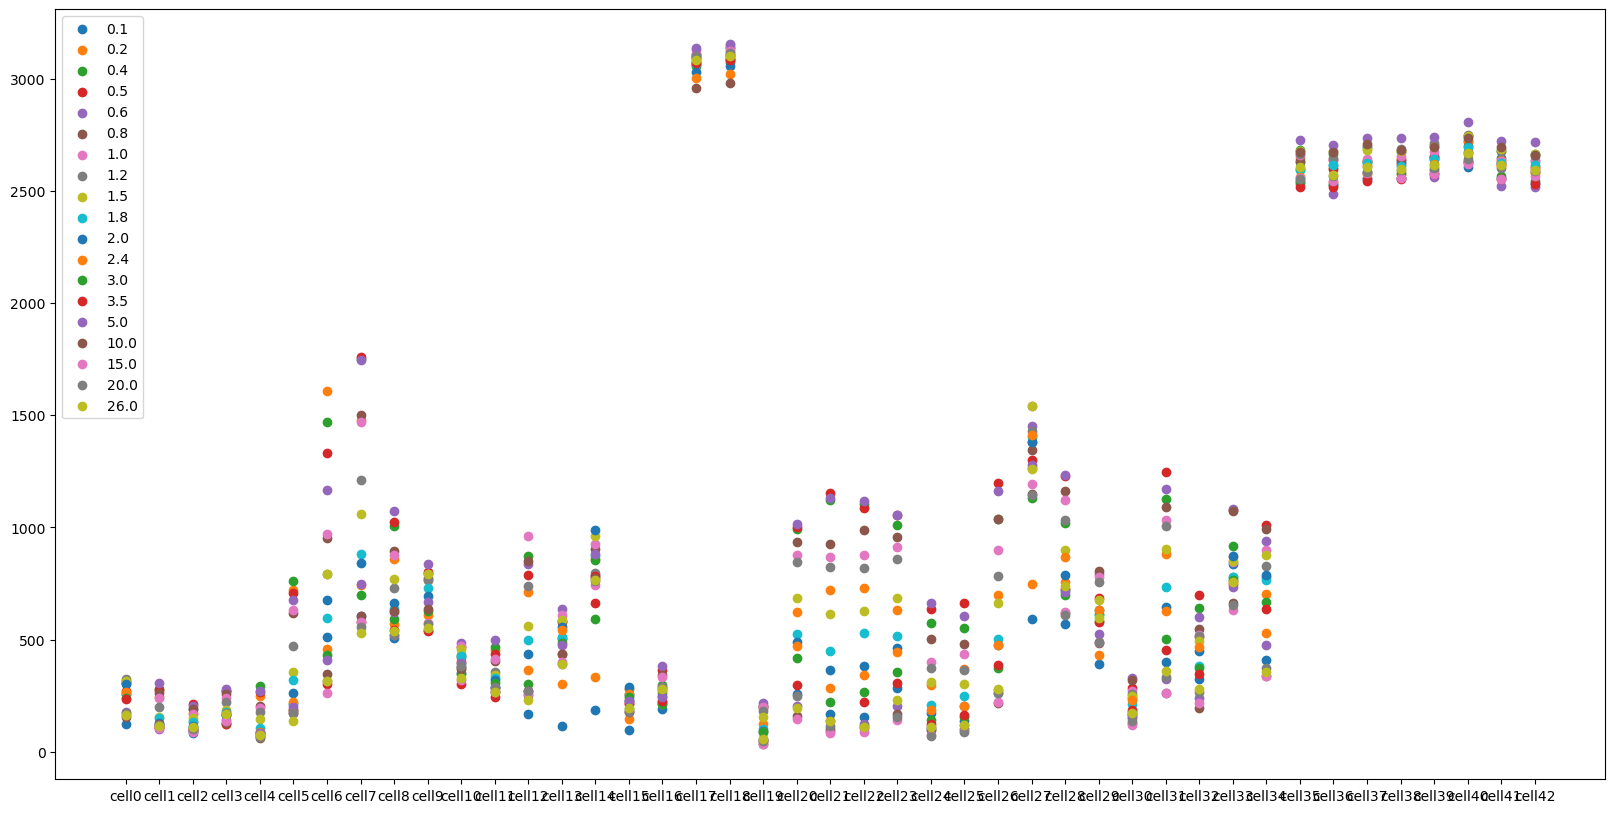

In [55]:
plt.figure(figsize=(20, 10))
#ax = fig.add_subplot(111)

for cell_num in datadf['Stimulus Diameter'].unique():
    cell_df = datadf[datadf["Stimulus Diameter"] == cell_num]
    plt.scatter(cell_df["Cell Number"], cell_df["Spike Count"], label=cell_num)
plt.legend(datadf['Stimulus Diameter'].unique())

Text(0, 0.5, 'Spike Count')

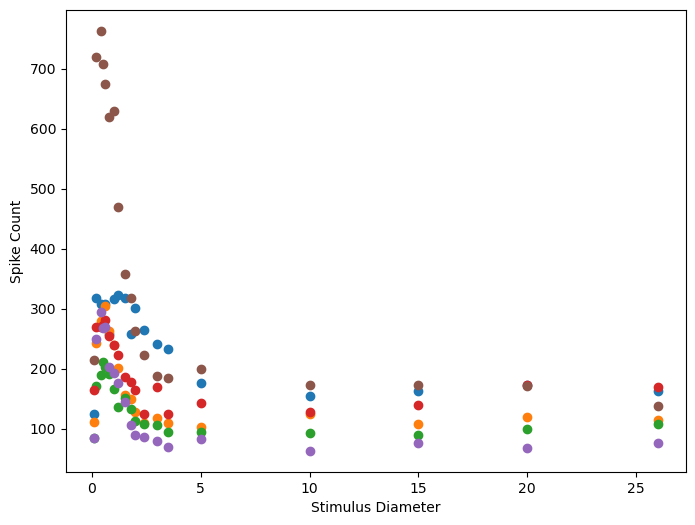

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the spike count arrays
spike_counts = [
    np.array([124., 317., 307., 272., 308., 257., 316., 322., 317., 258., 301., 264., 241., 233., 176., 155., 163., 173., 162.]),
    np.array([111., 243., 279., 276., 304., 263., 240., 201., 156., 149., 127., 109., 118., 110., 102., 124., 107., 120., 114.]),
    np.array([84., 171., 189., 211., 202., 191., 166., 136., 151., 132., 113., 107., 106., 95., 95., 92., 89., 100., 108.]),
    np.array([164., 270., 270., 272., 281., 255., 239., 222., 186., 177., 164., 124., 169., 125., 143., 128., 139., 172., 169.]),
    np.array([85., 250., 295., 268., 270., 202., 193., 176., 144., 106., 89., 86., 80., 69., 82., 63., 76., 67., 76.]),
    np.array([214., 720., 763., 707., 675., 620., 630., 470., 357., 318., 263., 223., 188., 184., 200., 173., 173., 171., 137.])
]

# Define the cell names
cell_names = ["cell0", "cell1", "cell2", "cell3", "cell4", "cell5"]

# Define the stimulus diameters
stim_diameters = np.array([0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 1., 1.2, 1.5, 1.8, 2., 2.4, 3., 3.5, 5., 10., 15., 20., 26.])

# Create a list to hold the dataframes for each cell
df_list = []

# Loop over each cell and create a dataframe
for i, spike_count in enumerate(spike_counts):
    cell_name = cell_names[i]
    df = pd.DataFrame({
        "stim_diameter": stim_diameters,
        "spike_count": spike_count
    })
    df["cell"] = cell_name
    df_list.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(df_list, ignore_index=True)

# Create a scatter plot of the spike counts for each cell
plt.figure(figsize=(8, 6))
for cell_name in cell_names:
    cell_df = df[df["cell"] == cell_name]
    plt.scatter(cell_df["stim_diameter"], cell_df["spike_count"], label=cell_name)
plt.xlabel("Stimulus Diameter")
plt.ylabel("Spike Count")

In [61]:
import plotly.express as px
import pandas as pd

# Load your data
df = datadf.copy()

cell_df["Cell Number"], cell_df["Spike Count"],datadf['Stimulus Diameter']
# Create the scatterplot using plotly
fig = px.scatter(df, x='Cell Number', y='Spike Count', color='Stimulus Diameter', hover_name='Stimulus Diameter')

# Add titles and labels
fig.update_layout(
    title='Your Plot Title',
    xaxis_title='X Axis Label',
    yaxis_title='Y Axis Label')

# Display the interactive scatterplot
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed